# 项目：分析鸢尾花种类数据

## 分析目标

此数据分析报告的目的是基于鸢尾花的属性数据，分析两种鸢尾花萼片、花瓣的长度和宽度平均值，是否存在显著性差异，让我们可以对不同种类鸢尾花的属性特征进行推断。

## 简介

原始数据`Iris.csv`包括两种鸢尾花，每种有 50 个样本，以及每个样本的一些属性，包括萼片的长度和宽度、花瓣的长度和宽度。

`Iris.csv`每列的含义如下：
- Id：样本的ID。
- SepalLengthCm：萼片的长度（单位为厘米）。
- SepalWidthCm：萼片的宽度（单位为厘米）。
- PetalLengthCm：花瓣的长度（单位为厘米）。
- PetalWidthCm：花瓣的宽度（单位为厘米）。
- Species：鸢尾花种类。

# 读取数据

In [1]:
import pandas as pd

In [3]:
original_Irus = pd.read_csv("./Iris.csv")

# 评估数据

#### 评估数据整洁度

In [7]:
# 查看前5行
original_Irus.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
# 查看随机5行
original_Irus.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
91,92,6.1,3.0,4.6,1.4,Iris-versicolor
37,38,4.9,3.1,1.5,0.1,Iris-setosa
41,42,4.5,2.3,1.3,0.3,Iris-setosa
19,20,5.1,3.8,1.5,0.3,Iris-setosa
86,87,6.7,3.1,4.7,1.5,Iris-versicolor


符合 1.每列是一个变量，2.每行是一个观察值，3.每个单元格是一个数据 这三个要求

#### 评估数据干净程度

In [11]:
original_Irus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             100 non-null    int64  
 1   SepalLengthCm  100 non-null    float64
 2   SepalWidthCm   100 non-null    float64
 3   PetalLengthCm  100 non-null    float64
 4   PetalWidthCm   100 non-null    float64
 5   Species        100 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 4.8+ KB


完美数据
    1.建议把`Species：鸢尾花种类`数据类型从object转换为category
    2.建议把`Id：样本的ID`数据类型从int64转换为float64

#### 评估数据缺失值
可以从上面 评估数据干净程度 判断数据无缺失值

#### 评估重复数据
这里只需要查看 `Id：样本的ID`是否有重复即可,其他列都可以重复

In [15]:
original_Irus[original_Irus.duplicated()]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


`Id：样本的ID` 无重复数据

#### 评估不一致数据
这里只需要查看 `Species：鸢尾花种类`有无格式不一致

In [17]:
original_Irus["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Name: count, dtype: int64

完美数据，无不一致

#### 评估无效或不一致数据
多用`.describe()`查看DataFrame对象统计信息

In [19]:
original_Irus.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,5.471000,3.094000,2.862000,0.785000
std,29.011492,0.641698,0.476057,1.448565,0.566288
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,25.750000,5.000000,2.800000,1.500000,0.200000
50%,50.500000,5.400000,3.050000,2.450000,0.800000
75%,75.250000,5.900000,3.400000,4.325000,1.300000
max,100.000000,7.000000,4.400000,5.100000,1.800000


完美数据

# 清理数据
    1.建议把`Species：鸢尾花种类`数据类型从object转换为category
    2.建议把`Id：样本的ID`数据类型从int64转换为float64

In [22]:
# 开始清洗数据前，为了区分原始数据和清洗后数据，多用两个变量分别存储
cleaned_Irus = original_Irus.copy()

In [26]:
# 1.建议把`Species：鸢尾花种类`数据类型从object转换为category
cleaned_Irus["Species"] = cleaned_Irus["Species"].astype("category")

In [32]:
# 2.建议把`Id：样本的ID`数据类型从int64转换为float64
cleaned_Irus["Id"] = cleaned_Irus["Id"].astype("float64")

#### 根据 `Species：鸢尾花种类`拆分成两个不同的表
把表 cleaned_Irus 根据`Species：鸢尾花种类`进行拆分,拆分为`cleaned_Irus_versicolor`和`cleaned_Irus_setosa`

In [51]:
# cleaned_Irus_versicolor表
cleaned_Irus_versicolor = cleaned_Irus.query('Species == "Iris-versicolor"').copy()

In [53]:
cleaned_Irus_versicolor.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 50 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             50 non-null     float64 
 1   SepalLengthCm  50 non-null     float64 
 2   SepalWidthCm   50 non-null     float64 
 3   PetalLengthCm  50 non-null     float64 
 4   PetalWidthCm   50 non-null     float64 
 5   Species        50 non-null     category
dtypes: category(1), float64(5)
memory usage: 2.5 KB


In [57]:
# cleaned_Irus_setosa表
cleaned_Irus_setosa = cleaned_Irus.query('Species == "Iris-setosa"').copy()

In [62]:
cleaned_Irus_setosa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             50 non-null     float64 
 1   SepalLengthCm  50 non-null     float64 
 2   SepalWidthCm   50 non-null     float64 
 3   PetalLengthCm  50 non-null     float64 
 4   PetalWidthCm   50 non-null     float64 
 5   Species        50 non-null     category
dtypes: category(1), float64(5)
memory usage: 2.5 KB


#### 可视化数据

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

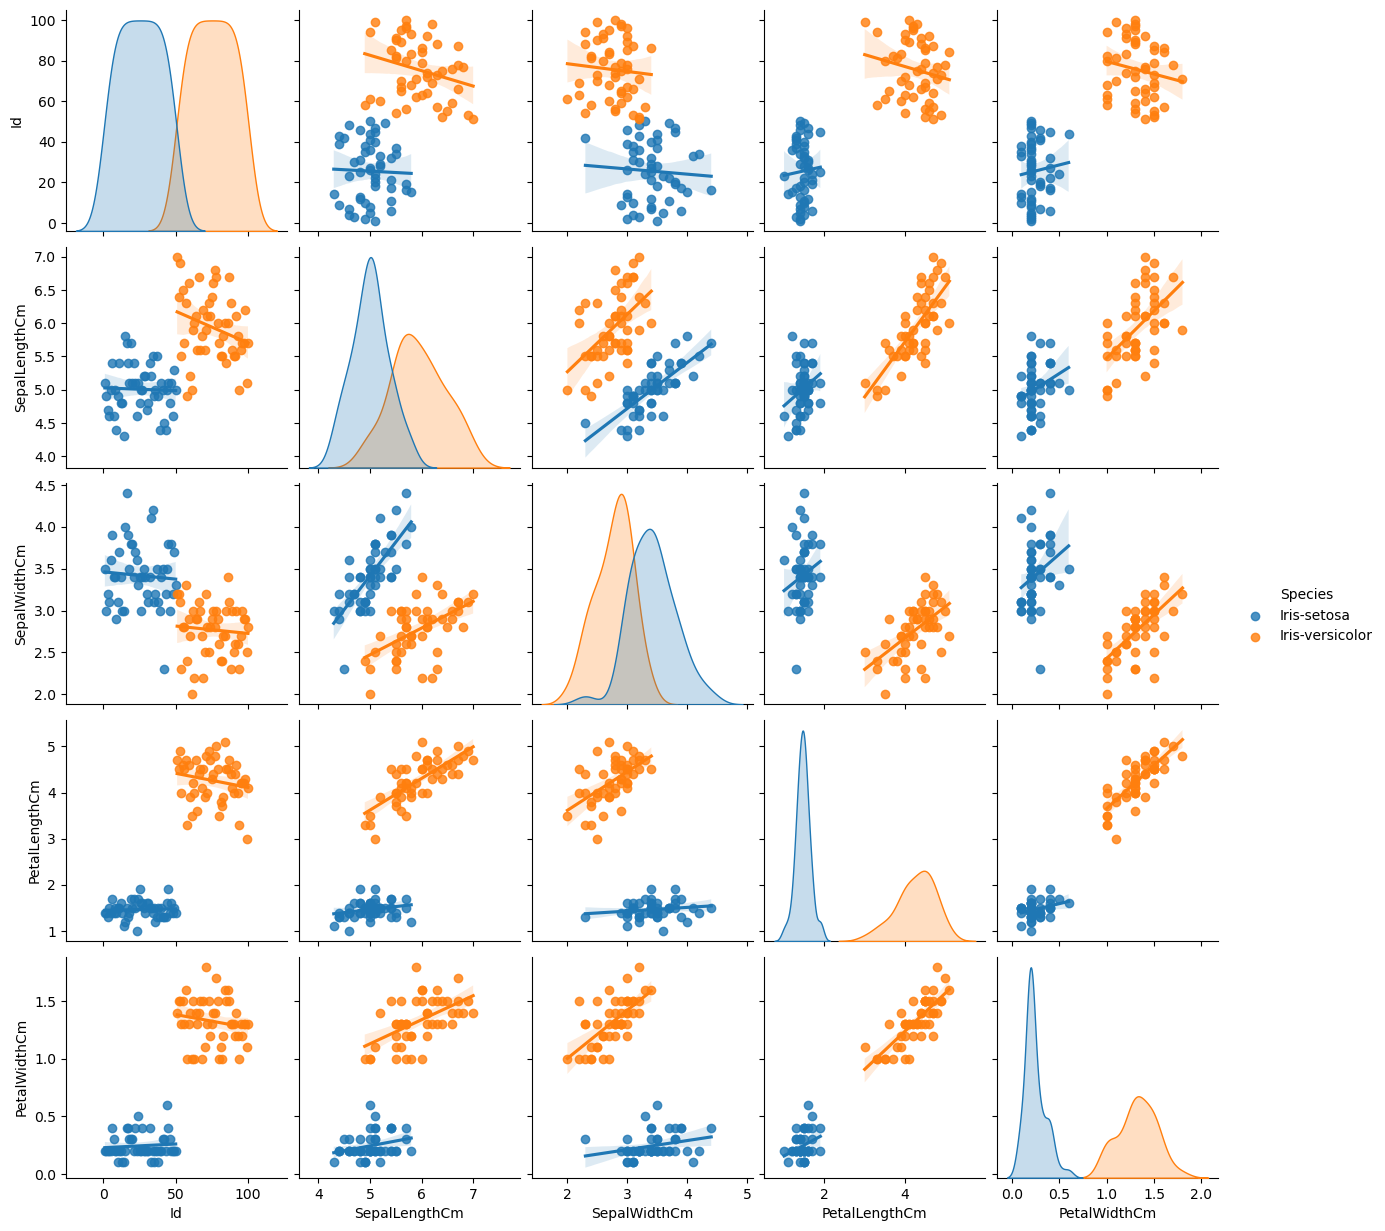

In [68]:
sns.pairplot(cleaned_Irus,hue="Species",kind="reg")

# 分析数据
我们将利用假设检验，依次检验Setosa和Vericolor这两种花，萼片长度 花瓣长度和宽度平均值方面，是否存在统计显著性差异。

In [70]:
from scipy.stats import ttest_ind

#### 分析萼片长度
下面这部分就是求萼片长度平均值的差异

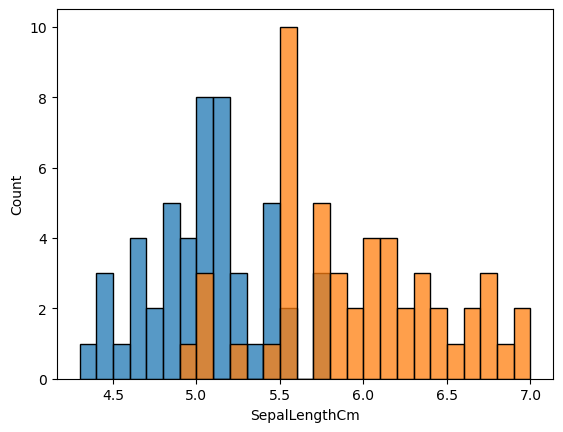

In [78]:
sns.histplot(cleaned_Irus_setosa["SepalLengthCm"],binwidth=0.1)
sns.histplot(cleaned_Irus_versicolor["SepalLengthCm"],binwidth=0.1)
plt.show()

开始t检验流程
##### 建立假设
$H_0$：setosa和versicolor的萼片长度平均值不存在显著区别
$H_1$：setosa和versicolor的萼片长度平均值存在显著区别

##### 确认检验是单尾还是双尾
由于我们只检验平均值是否存在差异，不在乎那个品种的萼片更长，所以是双尾检验。

##### 确定显著水平
0.05作为显著水平

##### 计算t值和p值

In [83]:
t_stat,p_value = ttest_ind(cleaned_Irus_setosa['SepalLengthCm'],cleaned_Irus_versicolor['SepalLengthCm'])

In [87]:
print("t值 = {}".format(t_stat))
print("p值 = {}".format(p_value))

t值 = -10.52098626754911
p值 = 8.985235037487079e-18


p值太小了，我们应该拒绝原假设。setosa和versicolor萼片长度存在明显差异。

#### 分析萼片宽度

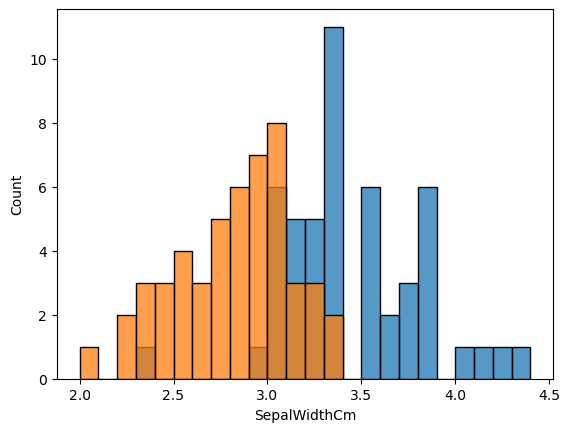

In [90]:
# 查看 setosa和versicolor萼片宽度的平均值情况
sns.histplot(cleaned_Irus_setosa['SepalWidthCm'],binwidth=0.1)
sns.histplot(cleaned_Irus_versicolor['SepalWidthCm'],binwidth=0.1)
plt.show()

开始t检验流程
##### 建立假设
$H_0$：setosa和versicolor的萼片宽度平均值不存在显著区别
$H_1$：setosa和versicolor的萼片宽度平均值存在显著区别

##### 确认检验是单尾还是双尾
由于我们只检验平均值是否存在差异，不在乎那个品种的萼片更长，所以是双尾检验。

##### 确定显著水平
0.05作为显著水平

##### 计算t值和p值

In [92]:
t_stat,p_value = ttest_ind(cleaned_Irus_setosa['SepalWidthCm'],cleaned_Irus_versicolor['SepalWidthCm'])

In [94]:
print("t值 = {}".format(t_stat))
print("p值 = {}".format(p_value))

t值 = 9.282772555558111
p值 = 4.362239016010214e-15


p值太小，拒绝原假设。setosa和versicolor萼片宽度度平均值有明显差异。

##### 结论
setosa和versicolor萼片宽度，长度有显著差异。